In [2]:
#Đối với dữ liệu sau khi đã chuẩn hóa
#import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.model_selection import *
from math import *

In [3]:
#Thông tin dữ liệu đã chuẩn hóa
DATA_LOADER = pd.read_csv("cadata_copy.csv")
DATA_ATTR = DATA_LOADER.iloc[:, 2:]
DATA_VALUE = DATA_LOADER.iloc[:, 1]

print("Số dòng dữ liêu: {}".format(len(DATA_ATTR)))

Số dòng dữ liêu: 10988


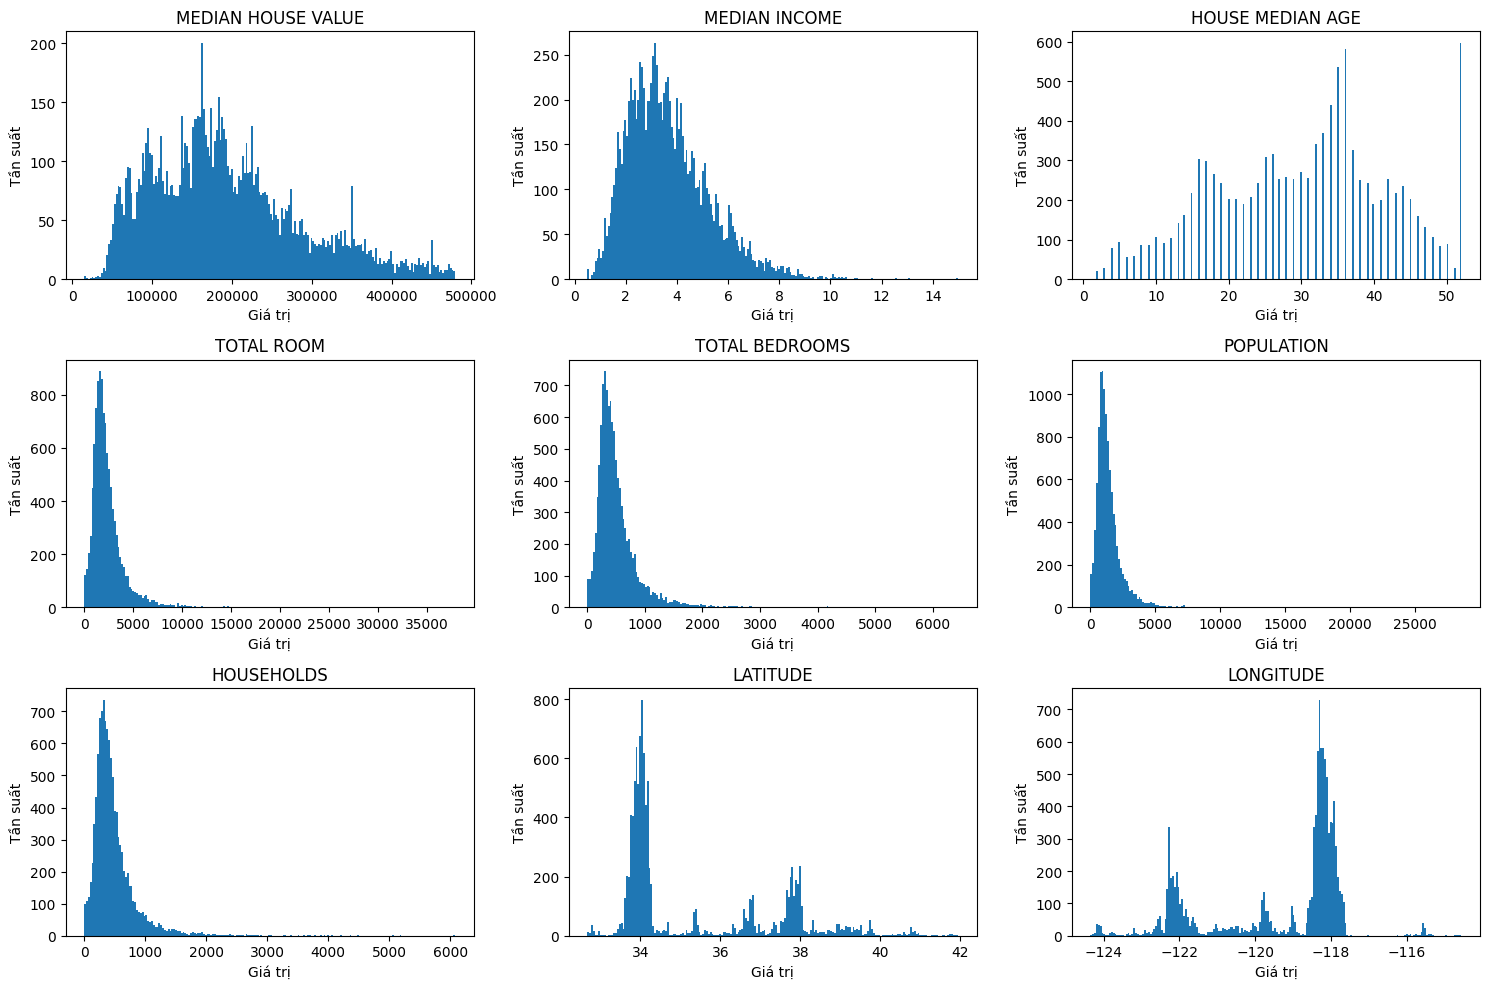

In [3]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

i = 0
for row in axs:
    for ax in row:
        if i < len(DATA_LOADER.columns[1:]):
            name = DATA_LOADER.columns[1:][i]
            ax.hist(DATA_LOADER[name], bins=200)
            ax.set_title(name)
            ax.set_xlabel("Giá trị")
            ax.set_ylabel("Tần suất")
            i += 1
        else:
            ax.axis('off')

plt.tight_layout()
plt.show()

MSE: 8235341219.810164
RMSE: 90748.78081721079


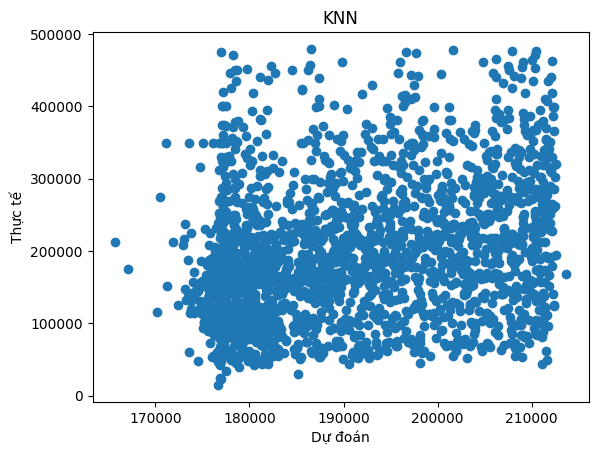

mean MAE: 64873.59931262045
mean MSE: 7101182252.09742
mean RMSE: 84257.07808121739
Best parameters:  {'algorithm': 'brute', 'leaf_size': 71, 'n_neighbors': 39, 'weights': 'distance'}
Best score:  0.12338100135764814


In [4]:
# với KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(DATA_ATTR, DATA_VALUE, test_size=0.2, train_size=0.8, shuffle=True)

k = int(len(X_train)/2)

knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_pred))))

plt.scatter(x=y_pred, y=y_test)
plt.title("KNN")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

# KFold
knn = KNeighborsRegressor(n_neighbors=5)

kfold = KFold(n_splits=5, shuffle=True)
arr_mae = []
arr_mse = []
arr_rmse = []

#lap qua K-Fold
for train_index, test_index in kfold.split(DATA_ATTR):
    X_train, X_test = DATA_ATTR.iloc[train_index], DATA_ATTR.iloc[test_index]
    y_train, y_test = DATA_VALUE.iloc[train_index], DATA_VALUE.iloc[test_index]
    
    knn.fit(X_train, y_train) #train mo hinh
    y_predict = knn.predict(X_test)
    arr_mae.append(mean_absolute_error(y_test, y_predict))
    arr_mse.append(mean_squared_error(y_test, y_predict))
    arr_rmse.append(sqrt(mean_squared_error(y_test, y_predict)))
print("mean MAE: {}".format(np.mean(arr_mae)))
print("mean MSE: {}".format(np.mean(arr_mse)))
print("mean RMSE: {}".format(np.mean(arr_rmse)))


#Grid cho KNN
param_grid = {
    'n_neighbors': [np.random.randint(1, 100)],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [np.random.randint(1, 100)]
}

grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)


MSE: 6489005738.244109
RMSE: 80554.36510980711


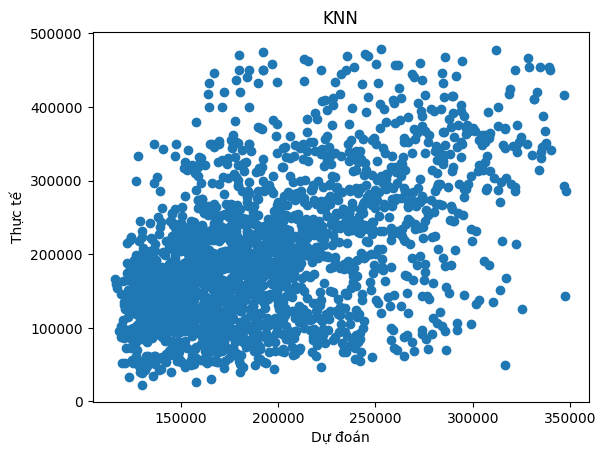

In [5]:
#KNN sau khi tinh chỉnh tham số
knn = KNeighborsRegressor(algorithm='brute', leaf_size=71, n_neighbors=39, weights="distance")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_pred))))

plt.scatter(x=y_pred, y=y_test)
plt.title("KNN")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

In [38]:
#thuật toán cây quyết định hồi quy
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import *
from sklearn.metrics import *

X_train, X_test, y_train, y_test = train_test_split(DATA_ATTR, DATA_VALUE, test_size=0.2, train_size=0.8, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("----------------------------------------------------------------")

#K Fold
for train_index, test_index in kfold.split(DATA_ATTR):
    X_train, X_test = DATA_ATTR.iloc[train_index], DATA_ATTR.iloc[test_index]
    y_train, y_test = DATA_VALUE.iloc[train_index], DATA_VALUE.iloc[test_index]
    
    tree.fit(X_train, y_train) #train mo hinh
    y_predict = tree.predict(X_test)
    arr_mae.append(mean_absolute_error(y_test, y_predict))
    arr_mse.append(mean_squared_error(y_test, y_predict))
    arr_rmse.append(sqrt(mean_squared_error(y_test, y_predict)))
print("mean MAE: {}".format(np.mean(arr_mae)))
print("mean MSE: {}".format(np.mean(arr_mse)))
print("mean RMSE: {}".format(np.mean(arr_rmse)))


#Grid tìm param
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [np.random.randint(1, 100)],
    'min_samples_split': [np.random.randint(1, 100)],
    'min_samples_leaf': [np.random.randint(1, 100)], 
    'min_weight_fraction_leaf': [np.random.random()],
    'max_features': [None, 'log2', 'sqrt', np.random.randint(1, 10)],
    'random_state': [np.random.randint(1, 100)],
    'max_leaf_nodes': [np.random.randint(1, 100)],
    'min_impurity_decrease': [np.random.random()],
    'ccp_alpha': [np.random.random()]
}

# Sử dụng GridSearchCV để tìm kiếm siêu tham số tốt nhất cho mô hình DecisionTreeRegressor
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

MSE: 3201379902.0932665
RMSE: 56580.737906934955
----------------------------------------------------------------
mean MAE: 39960.9043087915
mean MSE: 3637715390.574229
mean RMSE: 59994.69490138458
Best parameters: {'ccp_alpha': 0.4944683040403438, 'criterion': 'squared_error', 'max_depth': 65, 'max_features': None, 'max_leaf_nodes': 36, 'min_impurity_decrease': 0.7671963881392091, 'min_samples_leaf': 36, 'min_samples_split': 51, 'min_weight_fraction_leaf': 0.24195483901584436, 'random_state': 75, 'splitter': 'best'}
Best score: 0.26064923952150154


MSE: 5985089442.649545
RMSE: 77363.3598200695
----------------------------------------------------------------


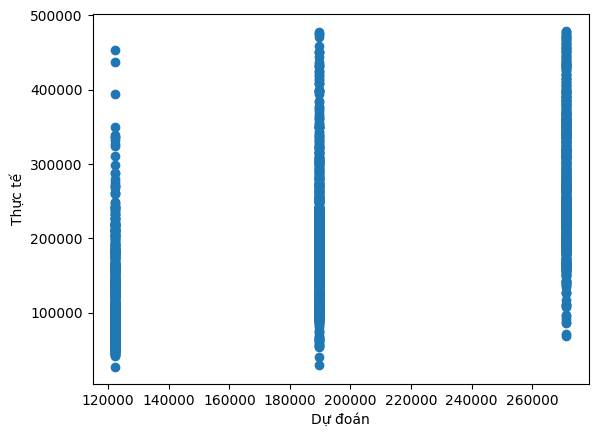

In [39]:
#Cây hồi quy sau khi tinh chỉnh tham số
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *

tree = DecisionTreeRegressor(
    ccp_alpha=0.4944683040403438,
    criterion='squared_error',
    max_depth=65, 
    max_features=None,
    max_leaf_nodes=36, 
    min_impurity_decrease=0.7671963881392091,
    min_samples_leaf=36,
    min_samples_split=51, 
    min_weight_fraction_leaf=0.24195483901584436,
    random_state=75,
    splitter='best'
    )
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("----------------------------------------------------------------")

plt.scatter(x=y_pred, y=y_test)
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

In [6]:
#Cây hồi quy + Bagging
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.metrics import *
from sklearn.model_selection import *

X_train, X_test, y_train, y_test = train_test_split(DATA_ATTR, DATA_VALUE, test_size=0.2, train_size=0.8, shuffle=True)
tree = DecisionTreeRegressor()
bagging = BaggingRegressor(estimator=tree, n_estimators=20)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("----------------------------------------------------------------")


#Cây hồi quy + Adaboots
ada = AdaBoostRegressor(estimator=tree, n_estimators=50)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("----------------------------------------------------------------")


#Random Forest
forest = RandomForestRegressor(n_estimators=50, criterion='squared_error', max_depth=3)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("----------------------------------------------------------------")

#Random Forest + GridSearch
param_grid = {
    'n_estimators' : [np.random.randint(10, 150)], 
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_features': ['sqrt', 'log2'],
              }
grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

MSE: 1768564318.7534282
RMSE: 42054.30202432836
----------------------------------------------------------------
MSE: 1772718629.845769
RMSE: 42103.665278046385
----------------------------------------------------------------
MSE: 4060888174.8274693
RMSE: 63725.09846855844
----------------------------------------------------------------
Best parameters:  {'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 57}
Best score:  0.7922205669712759


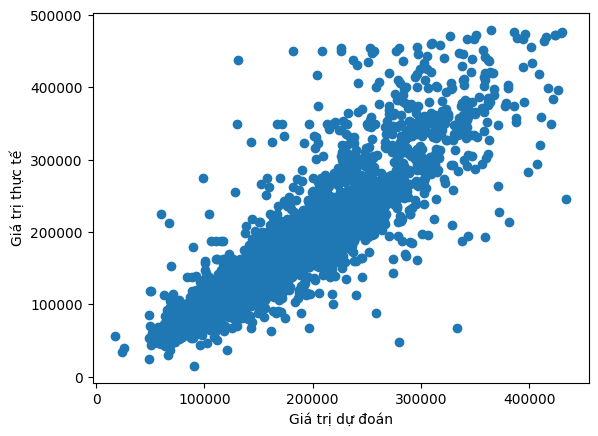

MAE: 32662.239556029006
MSE: 2234803268.9737015
RMSE: 47273.70589422519
------------------------------------------------


In [7]:
#cài đặt giải thuật votting 
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.linear_model import *
from sklearn.model_selection import *
X_train, X_test, y_train, y_test = train_test_split(DATA_ATTR, DATA_VALUE, test_size=0.2, train_size=0.8, shuffle=True)

#TreeRegression + Bagging
#RandomForest 
#LinearRegression
#Votting

tree = DecisionTreeRegressor()
bagging = BaggingRegressor(estimator=tree, n_estimators=10)

forest = RandomForestRegressor(
    n_estimators=100,
    bootstrap=True,
    max_depth=8
)

linear = LinearRegression()

votting = VotingRegressor(estimators=[('bagging', bagging), ('forest', forest), ('linear', linear)])
votting.fit(X_train, y_train)

y_predict = votting.predict(X_test)


plt.scatter(x=y_predict, y=y_test)
plt.xlabel("Giá trị dự đoán")
plt.ylabel("Giá trị thực tế")
plt.show()

print("MAE: {}".format(mean_absolute_error(y_test, y_predict)))
print("MSE: {}".format(mean_squared_error(y_test, y_predict)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_predict))))
print("------------------------------------------------")

In [8]:
import numpy as np
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.ensemble import *

X_train, X_test, y_train, y_test = train_test_split(DATA_ATTR, DATA_VALUE, test_size=0.2, train_size=0.8, shuffle=True)
linear = LinearRegression(fit_intercept=True)

linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("----------------------------------------------------------------")


#tìm tham số
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [int(np.random.randint(10, 100))], # Modified here
    'positive': [False, True]
}

grid = GridSearchCV(LinearRegression(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

MSE: 3578846418.0490646
RMSE: 59823.46043191638
----------------------------------------------------------------
Best parameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': 96, 'positive': False}
Best score:  0.5961426324945046


In [9]:
#RandomSearch CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import randint

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(DATA_ATTR, DATA_VALUE, test_size=0.2, train_size=0.8, shuffle=True)

# Định nghĩa không gian siêu tham số (hyperparameter space)
param_grid = {
    'fit_intercept': [False, True],
    'copy_X': [True, False],
    'n_jobs': [np.random.randint(10, 100)],  # Sử dụng randint từ scipy.stats để tạo số nguyên ngẫu nhiên trong một khoảng
    'positive': [False, True]
}

# Khởi tạo RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=LinearRegression(), param_distributions=param_grid, cv=5, n_iter=10, random_state=42)

# Tiến hành tìm kiếm ngẫu nhiên trên không gian siêu tham số
random_search.fit(X_train, y_train)

# In ra kết quả tốt nhất
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

c:\Users\tvo22\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters:  {'positive': False, 'n_jobs': 61, 'fit_intercept': True, 'copy_X': True}
Best score:  0.5987270156415836


In [16]:
#bagging + Linear + GridSearch
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.metrics import *

linear = LinearRegression()

bagging = BaggingRegressor(estimator=linear)

param_grid = {
    'n_estimators': [np.random.randint(10, 100)],
    'max_samples': [np.random.randint(1, len(DATA_ATTR))],
    'max_features': [np.random.randint(1, len(DATA_ATTR.columns))],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'oob_score': [True, False],
    'warm_start': [True, False],
    'n_jobs': [np.random.randint(1, 100)],
    'verbose': [np.random.randint(1, 100)]
}

grid = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=13)]: Done   2 out of  13 | elapsed:    4.9s remaining:   27.6s
[Parallel(n_jobs=13)]: Done   4 out of  13 | elapsed:    5.1s remaining:   11.7s
[Parallel(n_jobs=13)]: Done   6 out of  13 | elapsed:    5.4s remaining:    6.3s
[Parallel(n_jobs=13)]: Done   8 out of  13 | elapsed:    5.4s remaining:    3.3s
[Parallel(n_jobs=13)]: Done  10 out of  13 | elapsed:    5.7s remaining:    1.6s
[Parallel(n_jobs=13)]: Done  13 out of  13 | elapsed:    5.8s finished
[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=13)]: Batch computation too fast (0.005017995834350586s.) Setting batch_size=2.
[Parallel(n_jobs=13)]: Done   2 out of  13 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=13)]: Done   4 out of  13 | elapsed:    0.0s remain

Best parameters:  {'bootstrap': True, 'bootstrap_features': False, 'max_features': 6, 'max_samples': 2909, 'n_estimators': 13, 'n_jobs': 20, 'oob_score': False, 'verbose': 11, 'warm_start': False}
Best score:  0.5759286410721456


[Parallel(n_jobs=13)]: Done  10 out of  13 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=13)]: Done  13 out of  13 | elapsed:    0.0s finished


[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=13)]: Done   2 out of  13 | elapsed:    5.1s remaining:   28.6s
[Parallel(n_jobs=13)]: Done   4 out of  13 | elapsed:    5.2s remaining:   11.8s
[Parallel(n_jobs=13)]: Done   6 out of  13 | elapsed:    5.3s remaining:    6.2s
[Parallel(n_jobs=13)]: Done   8 out of  13 | elapsed:    5.3s remaining:    3.3s
[Parallel(n_jobs=13)]: Done  10 out of  13 | elapsed:    5.4s remaining:    1.6s
[Parallel(n_jobs=13)]: Done  13 out of  13 | elapsed:    5.5s finished
[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=13)]: Batch computation too fast (0.006000518798828125s.) Setting batch_size=2.
[Parallel(n_jobs=13)]: Done   2 out of  13 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=13)]: Done   4 out of  13 | elapsed:    0.0s remain

MSE: 3993313176.4653087
RMSE: 63192.66710992114
----------------------------------------------------------------


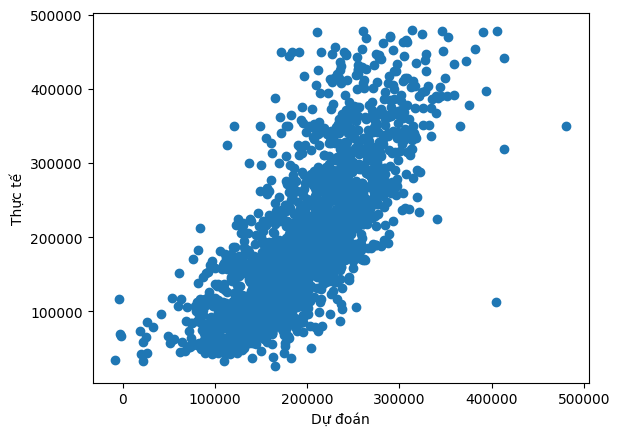

In [17]:
#đặt lại tham số cho bagging
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.metrics import *

linear = LinearRegression()

bagging = BaggingRegressor(
    estimator=linear, 
    bootstrap=True, 
    bootstrap_features=False, 
    max_features=6,
    max_samples=2909, 
    n_estimators=13,
    n_jobs=20,
    oob_score=False,
    verbose=11,
    warm_start=False,
    )

bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("RMSE: {}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("----------------------------------------------------------------")
plt.scatter(x=y_pred, y=y_test)
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()